In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
############################# Importing packages ###################################

import numpy as np                    # to handle arrays and matrices
import pickle

from scipy.linalg import toeplitz     # to generate toeplitz matrix
from scipy.stats import chi2          # to have chi2 quantiles 
from scipy.special import chdtri

import matplotlib.pyplot as plt       # to plot histograms ...
import pandas as pd                   # to handle and create dataframes

import time
import concurrent.futures
import random
import os
from scipy.linalg import toeplitz     # to generate toeplitz matrix

def scalar(A,B):
    """Takes two symmetric matrices A and B of sizes q
    and returns the modified frobenius scalar of A and B
    """
    return(np.trace(A.dot(np.transpose(B)))/A.shape[0])


def norm(A):
    """Takes a symmetric matrix A of sizes q
    and returns the norm of A
    This norm is associated to the modified frobenius scalar 
    """
    return np.sqrt(scalar(A,A))

def cov_toep(s, q):
    """A function that takes the dependency thresholds $s$ 
    and the dimension $q$ and returns a qxq-toeplitz matrix.
    """
    row = np.array([])
    for k in range(q):
        row = np.append(row, float(s**k))
    return toeplitz(row, row)

# fonction qui reçoit S^2 et calcul alpha2
def alphaaa1(S_2):
    q = len(S_2)
    I_q = np.diag(np.ones(q))
    sigma2 = scalar(S_2,I_q)
    alpha2 = norm(S_2 - sigma2*I_q)**2
    return alpha2

# fonction qui reçoit la diagonale de S^2 et calcul alpha2
def alphaaa2(vec):
    q = len(vec)
    I_q = np.diag(np.ones(q))
    S_2 = np.diag(vec)
    sigma2 = scalar(S_2,I_q)
    alpha2 = norm(S_2 - sigma2*I_q)**2
    return alpha2

In [3]:
q_list = list(pickle.load(open("q_list", "rb")))
n_list = list(pickle.load(open("n_list", "rb")))

In [4]:
[alphaaa1(cov_toep(0.25,q)) for q in q_list]

[0.13048888888888885,
 0.1319111111111111,
 0.13238518518518516,
 0.1326222222222222,
 0.13276444444444443,
 0.13285925925925923,
 0.1329269841269841,
 0.13297777777777772]

In [5]:
[alphaaa1(cov_toep(0.6,q)) for q in q_list]

[1.0898437500000002,
 1.107421875,
 1.1132812499999998,
 1.1162109374999998,
 1.1179687499999995,
 1.119140625,
 1.1199776785714288,
 1.1206054687499998]

In [5]:
alpha_dep_99 = [alphaaa1(cov_toep(0.99,q)) for q in q_list]
alpha_dep_99

[35.74129922798838,
 55.63558896635379,
 67.1216545130768,
 74.1974025217765,
 78.83310482926932,
 82.04261087020382,
 84.37246235469037,
 86.13181245597147]

In [29]:
[alphaaa1(cov_toep(0.99999,q)) for q in q_list]

[48.98334408090853,
 98.93337298370449,
 148.85011834535834,
 198.73360511617344,
 248.5838582265028,
 298.4009025867656,
 348.184763087464,
 397.9354645991996]

In [42]:
[alphaaa1(cov_toep(0.999999999999999999999999999999999999999999999,q)) for q in q_list]

[49.0,
 99.0,
 148.99999999999997,
 199.0,
 248.99999999999997,
 299.0,
 349.00000000000006,
 398.99999999999994]

In [35]:
def sumk(n):
    return 9*sum([10**(-k) for k in range(1,n+1)])

sumk(4)

0.9999

<IPython.core.display.Javascript object>


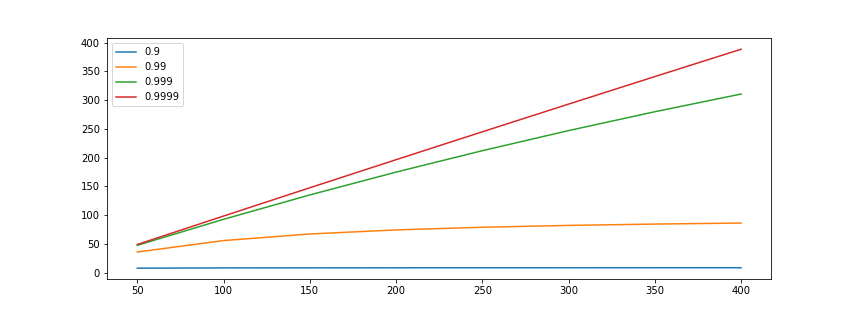

In [39]:
%matplotlib notebook
for i in range(1,5):
    plt.plot(q_list, [alphaaa1(cov_toep(sumk(i),q)) for q in q_list], label=sumk(i))
    plt.legend()

plt.show()

## Construction de la liste des valeurs de $q$ ainsi que celle des valeurs de $n$

In [2]:
q_list = np.arange(50,450,50)
n_list = np.arange(50,225,25)
for q in q_list[:3]:
    for n in n_list[:3]:
        if n <= q : print(q,n,round(q/n,2))

50 50 1.0
100 50 2.0
100 75 1.33
100 100 1.0
150 50 3.0
150 75 2.0
150 100 1.5


In [3]:
# q et n pour des valeurs fixes de q/n, q/n = 1 and q/n=2
for q in q_list:
    for n in n_list:
        if n <= q and q/n==1 : print("q=",q, ";\t n=",n, ";\t q/n=",round(q/n,2))
            
for q in q_list:
    for n in n_list:
        if n <= q and q/n==2 : print("q=",q, ";\t n=",n, ";\t q/n=",round(q/n,2))

q= 50 ;	 n= 50 ;	 q/n= 1.0
q= 100 ;	 n= 100 ;	 q/n= 1.0
q= 150 ;	 n= 150 ;	 q/n= 1.0
q= 200 ;	 n= 200 ;	 q/n= 1.0
q= 100 ;	 n= 50 ;	 q/n= 2.0
q= 150 ;	 n= 75 ;	 q/n= 2.0
q= 200 ;	 n= 100 ;	 q/n= 2.0
q= 250 ;	 n= 125 ;	 q/n= 2.0
q= 300 ;	 n= 150 ;	 q/n= 2.0
q= 350 ;	 n= 175 ;	 q/n= 2.0
q= 400 ;	 n= 200 ;	 q/n= 2.0


### Un premier jeu de valeurs propres, c'est-à-dire la diagonale de $S^2$ pour plusieurs valeurs de q

In [43]:
valeur_propre_collection = np.array([np.random.lognormal(size=q, sigma=1) for q in q_list])
print(*[np.std(i) for i in valeur_propre_collection], sep="\n")

1.4201941405336018
1.6856768290202366
3.033478093188223
1.9908952464491305
2.1203770954628824
1.9017642953156189
2.1699481792155133
1.8746815584901102


In [69]:
np.exp(1/2)

1.6487212707001282

In [76]:
valeur_propre_collection = np.array([np.random.lognormal(size=q, sigma=1) for q in q_list])
print(*[np.mean(i) for i in valeur_propre_collection], sep="\n")
print()
print(*[alphaaa2(i) for i in valeur_propre_collection], sep="\n")

1.598568621587769
1.502368149517207
1.5991760906576895
1.7347952045041808
1.5981867231776667
1.4872663014074528
1.6745850466917787
1.7107207193010003

2.739354565202441
1.5120971568434898
2.7456138677752504
4.589455220254421
3.1311126298432317
3.7137466861123993
3.5206768905095145
3.974672908424324


In [80]:
[alphaaa1(np.exp(1/2)*cov_toep(0.6,q)) for q in np.append(q_list, 10000)]

[2.9625024614846622,
 3.010284759250543,
 3.0262121918391705,
 3.0341759081334834,
 3.0389541379100713,
 3.0421396244277976,
 3.044414971940458,
 3.0461214825749545,
 3.0575892340387645]

In [83]:
[alphaaa1(cov_toep(0.6,q)) for q in np.append(q_list, 10000)]

[1.0898437500000002,
 1.107421875,
 1.1132812499999998,
 1.1162109374999998,
 1.1179687499999995,
 1.119140625,
 1.1199776785714288,
 1.1206054687499998,
 1.12482421875]

In [97]:
print("sigma^2 = ", np.log(1+np.sqrt(1+4*1.11))-np.log(2))
print("sigma = ", np.sqrt(np.log(1+np.sqrt(1+4*1.11))-np.log(2)))

sigma^2 =  0.5105398103066511
sigma =  0.714520685709414


In [102]:
[alphaaa2(i) for i in np.array([np.random.lognormal(size=q, sigma=0.71) for q in q_list])]

[0.7182440752076578,
 1.2519371640603563,
 1.1865661330154094,
 1.1694683615709787,
 0.9218263731726548,
 1.1710358700367298,
 1.2508285188659527,
 0.9810482882868599]

In [84]:
[alphaaa1(cov_toep(0.99,q)) for q in np.append(q_list, 10000)]

[35.74129922798838,
 55.63558896635379,
 67.1216545130768,
 74.1974025217765,
 78.83310482926932,
 82.04261087020382,
 84.37246235469037,
 86.13181245597147,
 98.00752506249833]

In [85]:
[alphaaa1(cov_toep(0.999999,q)) for q in np.append(q_list, 10000)]

[48.99833404081616,
 98.99333432995374,
 148.9850017840501,
 198.97333665305553,
 248.95833918690025,
 298.9400096354942,
 348.91834824872825,
 398.89335527647233,
 9932.665305424556]

In [103]:
[np.log(1+np.sqrt(1+4*alpha))-np.log(2) for alpha in [alphaaa1(cov_toep(0.999999,q)) for q in q_list]]

[2.0172623322600325,
 2.34775871359193,
 2.54287503094484,
 2.6820244309608263,
 2.7903263474104416,
 2.879036076904896,
 2.9541832901858363,
 3.019379090874696]

In [7]:
sigmas = [np.sqrt(np.log(1+np.sqrt(1+4*alpha))-np.log(2)) for alpha in alpha_dep_99]

In [111]:
sigs = [np.log(1+np.sqrt(1+4*alpha))-np.log(2) for alpha in [alphaaa1(cov_toep(0.999999,q)) for q in q_list]]
[alphaaa2(i) for i in np.array([np.random.lognormal(size=q, sigma=np.sqrt(sigs[list(q_list).index(q)])) for q in q_list])]

[11.407622995763822,
 53.682832365992226,
 107.50405645000727,
 55.48862097602159,
 52.4482875562841,
 201.0256035906509,
 92.75975301310413,
 413.5518383735914]

### L'écart-type des valeurs propre et $\alpha^2$ de $S^2$

In [77]:
for i, q in enumerate(q_list):
    I_q = np.diag(np.ones(q))
    vp = valeur_propre_collection[i]
    S_2 = np.diag(vp)
    sigma2 = scalar(S_2,I_q)
    alpha2 = norm(S_2 - sigma2*I_q)**2
    print("standard deviation is equal to =", np.std(vp), "\t;\talpha2 =", alpha2)

standard deviation is equal to = 1.6550995635315844 	;	alpha2 = 2.739354565202441
standard deviation is equal to = 1.2296735976849669 	;	alpha2 = 1.5120971568434898
standard deviation is equal to = 1.656989398811969 	;	alpha2 = 2.7456138677752504
standard deviation is equal to = 2.142301384085447 	;	alpha2 = 4.589455220254421
standard deviation is equal to = 1.7694950211411253 	;	alpha2 = 3.1311126298432317
standard deviation is equal to = 1.9271083742520552 	;	alpha2 = 3.7137466861123993
standard deviation is equal to = 1.8763466871848375 	;	alpha2 = 3.5206768905095145
standard deviation is equal to = 1.9936581724117914 	;	alpha2 = 3.974672908424324


### Générer plusieurs fois une matrice $S^2$ de même taille $q$, et ce pour plusieurs valeurs de q 

In [8]:
S_2_dico = {}
for q in q_list[:3]:
    for j, k in enumerate(range(5)):
        vp = np.random.lognormal(size=q, sigma=sigmas[q_list.index(q)])
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
print(S_2_dico.keys())
# Calcul des écart-types
print("écart-types des v.p. de chacune des matrices pour q = 50 : ", np.std(S_2_dico[list(S_2_dico.keys())[0]], axis=1))
# Calcul des alpha2
print("valeurs de alpha2 de chaque matrice pour q = 50 : ", [alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])

dict_keys([50, 100, 150])
écart-types des v.p. de chacune des matrices pour q = 50 :  [2.17970885 2.6945494  5.23377985 3.50609831 7.99837623]
valeurs de alpha2 de chaque matrice pour q = 50 :  [4.751130677401268, 7.260596447975339, 27.392451556886925, 12.292725344630107, 63.974022240602714]


dict_keys([50, 100, 150])
[1.85766833 1.31008252 5.24523567 2.38928045 1.70835806 2.31461636
 2.32493768 2.65176872 2.07145631 1.41798315 2.05121122 1.20174646
 1.97202626 1.72290065 2.01674991 2.51079824 3.7364525  1.37028044
 1.46597727 1.45403855 2.34092691 1.25949164 1.70328272 3.72944607
 1.16862211 0.8705149  2.05183486 3.24873603 1.16038475 1.68591855
 1.82057892 1.72006961 2.64685231 1.76224046 1.36691529 2.55271813
 3.76708526 1.74640932 2.15621444 1.60108441 1.29386386 2.365597
 1.51183815 2.33008273 1.37259019 1.56741065 1.90234254 1.60362104
 2.45729023 2.329759  ]
[3.4509316389134606, 1.7163162206844271, 27.51249725070785, 5.70866105309276, 2.9184872589075046, 5.357448875098937, 5.40533520032533, 7.0318773385404505, 4.290931249894241, 2.0106762008041508, 4.207467485331233, 1.4441945636581928, 3.8888875572390655, 2.9683866612744123, 4.067280212839588, 6.304107816802136, 13.961077277416322, 1.8776684757134527, 2.1490893655162644, 2.1142281127781466, 5.47993879653685, 1.58631

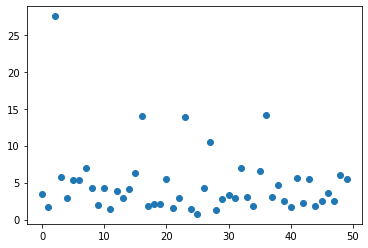

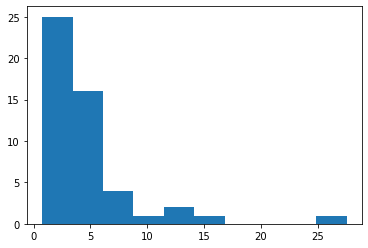

In [81]:
%matplotlib inline

# En augmentant le nombre de matrices générées, pour avoir plus de chances de tomber sur des matrices 
# de différentes tailles avec plus ou moins la même valeur de alpha
S_2_dico = {}
for q in q_list[:3]:
    for j, k in enumerate(range(50)):
        vp = np.random.lognormal(size=q, sigma=1)
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
print(S_2_dico.keys())
print(np.std(S_2_dico[list(S_2_dico.keys())[0]], axis=1))
print([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])

plt.plot([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]], "o");plt.show()
plt.hist([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])
plt.show()

dict_keys([50, 100, 150])
[1.67190653 1.7060132  1.51060198 1.66222639 1.75651334 1.86100041
 1.63035288 1.61946407 1.34614844 2.34442116 1.85796231 2.66643435
 1.73139622 2.10870105 1.87890566 1.55152923 1.24930908 1.82889779
 1.85151948 1.92250207 1.03195214 1.56942259 1.63005224 2.13156413
 1.78064915 1.23449007 1.5560187  1.35835808 1.55965737 1.34747668
 1.6276308  2.12818907 2.10548301 1.81766911 1.03084293 1.88042407
 1.62747188 1.26928394 1.24430118 1.32425513 1.60705332 1.46514485
 1.66520887 1.3963944  1.53556077 1.59209917 1.79365571 1.29098683
 1.64173018 1.48769769]
[2.6973380255996626, 2.411402163190675, 3.0112255004907347, 4.52223579499691, 20.695162372678684, 2.511551959582993, 3.727079715468362, 2.946976597428291, 1.237885067528377, 13.962071717914078, 4.510470941196516, 14.269166045871538, 4.3749191780117505, 4.716738677735958, 4.356688689615363, 1.6099319348239516, 1.6018442691377361, 3.3009889974777162, 15.526804443878271, 3.518629615785457, 1.2049630922778414, 10.4

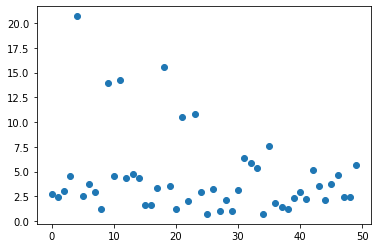

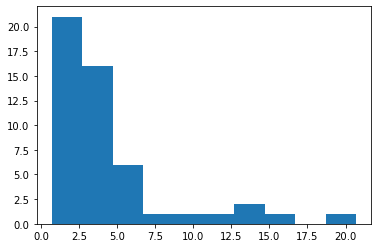

In [82]:
%matplotlib inline

# En augmentant le nombre de matrices générées, pour avoir plus de chances de tomber sur des matrices 
# de différentes tailles avec plus ou moins la même valeur de alpha
S_2_dico = {}
for q in q_list[:3]:
    for j, k in enumerate(range(50)):
        vp = np.random.lognormal(size=q, sigma=1)
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
print(S_2_dico.keys())
print(np.mean(S_2_dico[list(S_2_dico.keys())[0]], axis=1))
print([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])

plt.plot([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]], "o");plt.show()
plt.hist([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])
plt.show()

In [11]:
# isoler un alpha2 qui a une valeur entre 1.8 et 2.4 compris (plus elle est proche de 2 et mieux c'est)
isolated_values = np.array([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]] if 1.9<=alphaaa2(i)<=2.1])
print(len(isolated_values))
print(isolated_values)
print(isolated_values[np.argmin(isolated_values-2)])

6
[2.03018378 1.96737679 1.92770153 2.07452294 1.97619214 2.02751925]
1.9277015292561674


---
---
---
# Corresponding diagonals with same alpha as non diagonals
***
***
***

## alpha = 1.1 and sigma = 1

In [19]:
S_2_dico = {}
sig = np.sqrt(np.log(1+np.sqrt(1+4*1.1))-np.log(2))


# Generate 100 times a lognormal vector of size q
for q in q_list:
    for j, k in enumerate(range(1000)):
        vp = np.random.lognormal(size=q, sigma=sigmas[q_list.index(q)])
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
isolated_values = {}

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if alpha_dep_99[q_list.index(q)]-10<=alphaaa2(i)<=alpha_dep_99[q_list.index(q)]+10])
    print("q= ", q)
    print("number of matches :", len(isolated_values))
    print("the best value matching is ", isolated_values[np.argmin(np.abs(isolated_values-alpha_dep_99[q_list.index(q)]))])
    print("the index of matching value", np.where(np.array([alphaaa2(i) for i in collection])==
                                                  isolated_values[np.argmin(np.abs(isolated_values-sigmas[q_list.index(q)]))])[0][0])
    print()

q=  50
number of matches : 135
the best value matching is  35.81322639270601
the index of matching value 112

q=  100
number of matches : 90
the best value matching is  55.5057610930806
the index of matching value 633

q=  150
number of matches : 81
the best value matching is  67.16015515618975
the index of matching value 764

q=  200
number of matches : 83
the best value matching is  74.03142454338604
the index of matching value 459

q=  250
number of matches : 96
the best value matching is  78.71857289577437
the index of matching value 351

q=  300
number of matches : 77
the best value matching is  82.06276498069886
the index of matching value 377

q=  350
number of matches : 83
the best value matching is  84.38759586673962
the index of matching value 459

q=  400
number of matches : 83
the best value matching is  86.29469286163241
the index of matching value 902



In [20]:
for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if alpha_dep_99[q_list.index(q)]-10<=alphaaa2(i)<=alpha_dep_99[q_list.index(q)]+10])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-alpha_dep_99[q_list.index(q)]))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    print(alphaaa2(S_2_dico[q][match_value_idx]))

35.81322639270601
55.5057610930806
67.16015515618975
74.03142454338604
78.71857289577437
82.06276498069886
84.38759586673962
86.29469286163241


In [21]:
[alphaaa1(cov_toep(0.99,q)) for q in q_list]

[35.74129922798838,
 55.63558896635379,
 67.1216545130768,
 74.1974025217765,
 78.83310482926932,
 82.04261087020382,
 84.37246235469037,
 86.13181245597147]

In [23]:
vp_collection_d099 = []

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if alpha_dep_99[q_list.index(q)]-10<=alphaaa2(i)<=alpha_dep_99[q_list.index(q)]+10])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-alpha_dep_99[q_list.index(q)]))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    vp_collection_d099.append(S_2_dico[q][match_value_idx])

In [24]:
pickle.dump(vp_collection_d099, open("vp_collection_d099", "wb"))

## alpha = q-1 and sigma = 1

dict_keys([50, 100, 150, 200])


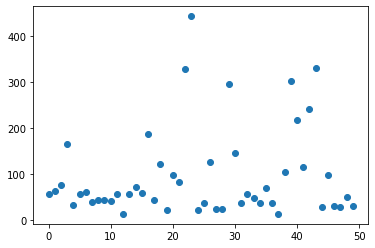

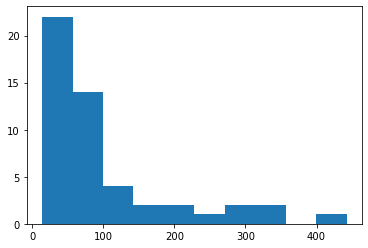

In [139]:
%matplotlib inline

# En augmentant le nombre de matrices générées, pour avoir plus de chances de tomber sur des matrices 
# de différentes tailles avec plus ou moins la même valeur de alpha
S_2_dico = {}
for q in q_list[:4]:
    for j, k in enumerate(range(50)):
        vp = np.random.lognormal(size=q, sigma=np.sqrt(np.log(1+np.sqrt(1+4*(q-1)))-np.log(2)))
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
print(S_2_dico.keys())
# print(np.mean(S_2_dico[list(S_2_dico.keys())[0]], axis=1))
# print([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])

plt.plot([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[2]]], "o");plt.show()
plt.hist([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[2]]])
plt.show()

In [142]:
S_2_dico = {}
sig = np.sqrt(np.log(1+np.sqrt(1+4*1.1))-np.log(2))


# Generate 100 times a lognormal vector of size q
for q in q_list:
    for j, k in enumerate(range(1000)):
        vp = np.random.lognormal(size=q, sigma=np.sqrt(np.log(1+np.sqrt(1+4*(q-1)))-np.log(2)))
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
isolated_values = {}

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if q-2.5<=alphaaa2(i)<=q+1])
    print("q= ", q)
    print("number of matches :", len(isolated_values))
    print("the best value matching is ", isolated_values[np.argmin(np.abs(isolated_values-(q-1)))])
    print("the index of matching value", np.where(np.array([alphaaa2(i) for i in collection])==
                                                  isolated_values[np.argmin(np.abs(isolated_values-(q-1)))])[0][0])
    print()

q=  50
number of matches : 12
the best value matching is  49.039571398609425
the index of matching value 195

q=  100
number of matches : 9
the best value matching is  98.92339030289976
the index of matching value 635

q=  150
number of matches : 1
the best value matching is  148.28374992358252
the index of matching value 422

q=  200
number of matches : 2
the best value matching is  198.15543030436604
the index of matching value 39

q=  250
number of matches : 3
the best value matching is  248.65334620433111
the index of matching value 519

q=  300
number of matches : 4
the best value matching is  298.76240625400715
the index of matching value 854

q=  350
number of matches : 2
the best value matching is  347.65327277210804
the index of matching value 188

q=  400
number of matches : 3
the best value matching is  397.90154545111807
the index of matching value 888



In [143]:
for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if q-2.5<=alphaaa2(i)<=q+1])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-(q-1)))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    print(alphaaa2(S_2_dico[q][match_value_idx]))

49.039571398609425
98.92339030289976
148.28374992358252
198.15543030436604
248.65334620433111
298.76240625400715
347.65327277210804
397.90154545111807


In [144]:
vp_collection_d0999999 = []

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if q-2.5<=alphaaa2(i)<=q+1])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-(q-1)))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    vp_collection_d0999999.append(S_2_dico[q][match_value_idx])

In [145]:
pickle.dump(vp_collection_d0999999, open("vp_collection_d0999999", "wb"))

In [147]:
teest = pickle.load(open("vp_collection_d0999999", "rb"))
print(teest[0])
print()
print(teest[-1][:60])

[3.18894520e-01 4.52994082e+01 1.28592317e+01 2.11195179e+00
 6.62357112e-01 5.82053682e+00 2.09626410e+00 4.00085785e-01
 2.93408094e-01 5.50537856e-02 5.57495114e-01 1.42318825e+00
 2.38894363e-01 7.46870598e-01 5.80652859e-01 4.62184826e+00
 5.47841374e-02 1.03344591e+00 3.54343430e-02 2.30767499e-01
 2.36480067e+00 4.55393557e+00 2.15870138e-01 2.87290090e+00
 1.02649741e+00 3.63394217e-01 2.22914488e-01 6.05129669e+00
 1.96964040e+00 4.55614851e-01 4.88561910e+00 6.04134953e+00
 1.51970862e+00 2.62885405e+00 1.46985040e+00 1.41892317e+00
 2.16914151e+01 3.38453119e+00 3.17823168e+00 5.20661610e+00
 5.92637439e-01 1.72292013e+00 1.20364968e+00 6.56391230e-01
 1.35797878e+00 6.04626546e-01 5.88333073e-01 1.99814061e+00
 2.86903237e-02 1.08931360e+00]

[5.30090161e-01 2.05928126e-02 1.53175755e+01 5.08827010e+00
 1.11098454e+00 6.11606243e-01 8.03896138e-02 4.89393945e+00
 5.54033762e-02 3.71208941e-01 1.03697852e+01 3.93740149e+00
 1.03993944e-01 2.02702807e+00 9.06405468e-01 1.0709

In [148]:
[alphaaa2(i) for i in teest]

[49.039571398609425,
 98.92339030289976,
 148.28374992358252,
 198.15543030436604,
 248.65334620433111,
 298.76240625400715,
 347.65327277210804,
 397.90154545111807]

### Stocker $S^2$
Vérfier d'abord que c'est le bon $\alpha^2$, c'est-à-dire que leur $\alpha^2$ sont proches

In [173]:
for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if 1.8<=alphaaa2(i)<=2.4])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-2))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    print(alphaaa2(S_2_dico[q][match_value_idx]))
    
for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 5
    isolated_values = np.array([alphaaa2(i) for i in collection if 4.5<=alphaaa2(i)<=5.5])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-4))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    print(alphaaa2(S_2_dico[q][match_value_idx]))

1.993066365613705
1.995667988032773
1.9956588156541615
2.0052626731249132
2.151484609828197
2.227792287784347
2.084701635151049
1.948271544049899
4.559315813319646
4.541632249194627
4.521032246785799
4.504829184413636
4.536351070409249
4.5618959138497
4.5385379118824325
4.525812841621547


### Finally, retained values of S_2 for $\alpha^2 \simeq 2$ and $\sigma=1$

In [174]:
vp_2_collection = []
vp_4_collection = []

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if 1.8<=alphaaa2(i)<=2.4])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-2))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    vp_2_collection.append(S_2_dico[q][match_value_idx])
    
for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 5
    isolated_values = np.array([alphaaa2(i) for i in collection if 4.5<=alphaaa2(i)<=5.5])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-4))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    vp_4_collection.append(S_2_dico[q][match_value_idx])

In [175]:
print(vp_2_collection[0])
print()

print(vp_4_collection[-1])

[2.46711588 0.86018508 1.07495414 1.6800156  4.26761975 1.08234407
 1.95240009 0.69453705 0.98142713 1.63324193 1.17184247 0.61900364
 3.29864058 0.83575721 0.18153526 0.96019059 3.80345511 3.31687954
 0.46826784 4.30019118 0.3889938  3.63735567 0.19013967 0.29697951
 0.385916   0.27761594 0.40523776 0.86949066 6.22058018 0.64186503
 4.39385353 1.00334181 0.34837744 0.36899693 1.90420533 1.84400636
 0.35764925 1.51948023 0.52194299 3.07349145 0.71847765 1.91378266
 0.22104288 0.56835563 0.40411491 3.13814471 0.47570603 0.56686326
 0.27495282 0.09545525]

[ 2.88273611  8.99208315  1.11764201  0.87570785  0.79117313  1.24937197
  0.29820935  0.55315273  0.2633677   1.72642518  1.56511554  1.77229498
  0.95223441  0.59744304  0.70987093  2.7181974   0.30290939  0.86312335
  0.93986214  0.5957847   0.39863364  1.38265376  2.5862597   2.27304526
  0.30726557  1.82943198  3.23645525  0.21410839  0.5917582   1.18941942
  0.66050092  1.42400653  1.53105144  0.39830927  0.52776993  4.85207811
 

In [176]:
pickle.dump(vp_2_collection, open("vp_2_collection_sigma1", "wb"))
pickle.dump(vp_4_collection, open("vp_4_collection_sigma1", "wb"))

In [177]:
teeeest = pickle.load(open("vp_2_collection_sigma1", "rb"))
len(teeeest)

8

## Now for $\sigma = 0.2$

On regarde d'abord comment les valeurs de $\alpha^2$ sont distribuées pour en sélectionner un même alpha pour toutes les valeurs de $q$.

dict_keys([50, 100, 150])
[0.47491395 0.42914929 0.49278067 0.44766501 0.37855787 0.54653258
 0.4450773  0.37447784 0.39351694 0.46102555 0.54255136 0.41824437
 0.46836856 0.53040365 0.3418025  0.42846818 0.43592334 0.53527777
 0.44018192 0.35635718 0.495133   0.37808082 0.45752727 0.45087038
 0.39297111 0.51266559 0.45415233 0.43344942 0.36415766 0.37353635
 0.49746833 0.58171805 0.56843838 0.42704773 0.46069014 0.33211083
 0.46773067 0.48816468 0.47157041 0.46679367 0.51920569 0.37277395
 0.50072631 0.41761478 0.45145534 0.37263255 0.46373305 0.39069392
 0.41224395 0.39196912]
[0.2255432590994334, 0.1841691110286184, 0.24283278644182552, 0.20040396099781158, 0.14330606180352634, 0.2986978630133279, 0.19809380126286252, 0.14023365352135533, 0.15485558350853706, 0.21254455329041796, 0.2943619819408849, 0.17492835368419105, 0.21936910487079128, 0.28132803684421026, 0.11682894607034014, 0.1835849812505453, 0.19002916239796572, 0.2865222921117168, 0.19376012464407963, 0.12699044285896444,

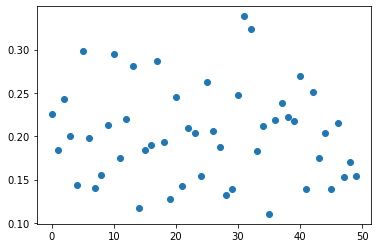

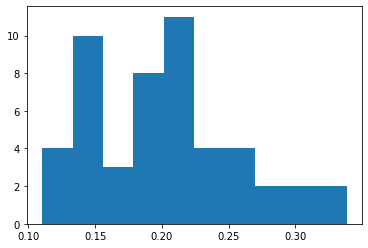

In [178]:
%matplotlib inline

# En augmentant le nombre de matrices, pour avoir plus de chances de tomber sur des matrices de différentes
# tailles avec plus ou moins la même valeur de alpha
S_2_dico = {}
for q in q_list[:3]:
    for j, k in enumerate(range(50)):
        vp = np.random.lognormal(size=q, sigma=0.4)
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
print(S_2_dico.keys())
print(np.std(S_2_dico[list(S_2_dico.keys())[0]], axis=1))
print([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])

plt.plot([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]], "o");plt.show()
plt.hist([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])
plt.show()

Une valeur entre $0.15$ et $0.25$ ferait l'affaire

In [179]:
S_2_dico = {}

# Generate 100 times a lognormal vector of size q
for q in q_list:
    for j, k in enumerate(range(100)):
        vp = np.random.lognormal(size=q, sigma=0.4)
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
isolated_values = {}

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if 0.15<=alphaaa2(i)<=0.25])
    print("q= ", q)
    print("number of matches :", len(isolated_values))
    print("the best value matching is ", isolated_values[np.argmin(np.abs(isolated_values-0.2))])
    print("the index of matching value", np.where(np.array([alphaaa2(i) for i in collection])==
                                                  isolated_values[np.argmin(np.abs(isolated_values-0.2))])[0][0])
    print()

q=  50
number of matches : 61
the best value matching is  0.1993876040192482
the index of matching value 92

q=  100
number of matches : 74
the best value matching is  0.20008224485626525
the index of matching value 24

q=  150
number of matches : 78
the best value matching is  0.19913827325065844
the index of matching value 14

q=  200
number of matches : 84
the best value matching is  0.19859731814079046
the index of matching value 13

q=  250
number of matches : 95
the best value matching is  0.19991755815079565
the index of matching value 72

q=  300
number of matches : 92
the best value matching is  0.19986192805084135
the index of matching value 93

q=  350
number of matches : 94
the best value matching is  0.20047692951573898
the index of matching value 64

q=  400
number of matches : 97
the best value matching is  0.20000250609983625
the index of matching value 15



# Attention sigma4 signifie $\sigma=0.4=2/5$

In [180]:
vp_collection_sigma4 = []

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if 0.15<=alphaaa2(i)<=0.25])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-0.2))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    vp_collection_sigma4.append(S_2_dico[q][match_value_idx])
    
pickle.dump(vp_collection_sigma4, open("vp_collection_sigma4", "wb"))

In [181]:
[alphaaa2(i) for i in vp_collection_sigma4]

[0.1993876040192482,
 0.20008224485626525,
 0.19913827325065844,
 0.19859731814079046,
 0.19991755815079565,
 0.19986192805084135,
 0.20047692951573898,
 0.20000250609983625]

Maintenant pour $sigma=2$

dict_keys([50, 100, 150])
[592.50754332   3.7547735    3.79223301   5.32471136 106.937549
  23.20899381  33.23686393  14.58707085   8.418266   106.68917594
   8.27431734   4.08041087  32.34818272   7.62083929  25.28880286
 121.88591791   9.45128529   5.04409599  12.55369088  66.77411501
  65.78064664  15.06018716  14.37751477  27.66071961   8.76433868
  58.39358861  12.75269307   8.08751467  25.26193859  14.26846786
  20.30896306  35.43061202   9.82533345  16.46011239   6.22097723
  16.35985668  46.96018652  30.11912253   6.15500898 110.24026285
   9.26578988  20.10950174   5.86225746  14.17706177   6.88054743
   3.45364399   8.46503354  12.39998798   5.77486568  52.02289303
  41.970219     8.17329262  12.5186808   64.82335451   7.66455047
   6.36513417  60.91575388   4.46658218 182.14937157  22.30358764
  25.81001308   4.2528063   23.51305988  71.35891123  14.92669968
  29.69875632   8.50735257 144.37206779   6.42711001   7.79539922
  12.2127071    8.44171253   8.19007605  26.11045615

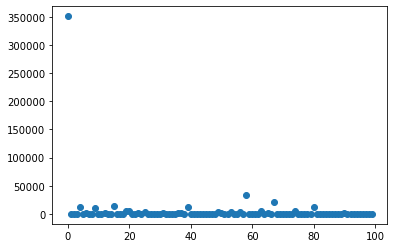

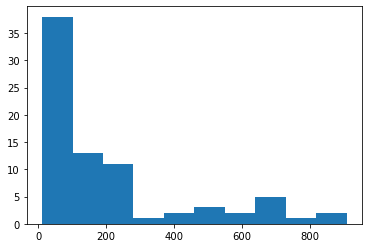

In [182]:
%matplotlib inline

# En augmentant le nombre de matrices, pour avoir plus de chances de tomber sur des matrices de différentes
# tailles avec plus ou moins la même valeur de alpha
S_2_dico = {}
for q in q_list[:3]:
    for j, k in enumerate(range(100)):
        vp = np.random.lognormal(size=q, sigma=2)
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
print(S_2_dico.keys())
print(np.std(S_2_dico[list(S_2_dico.keys())[0]], axis=1))
print([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]])

plt.plot([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]]], "o");plt.show()
plt.hist([alphaaa2(i) for i in S_2_dico[list(S_2_dico.keys())[0]] if alphaaa2(i)<=1000])
plt.show()

In [187]:
S_2_dico = {}

# Generate 100 times a lognormal vector of size q
for q in q_list:
    for j, k in enumerate(range(1000)):
        vp = np.random.lognormal(size=q, sigma=2)
        if not j : S_2_dico[q] = np.array(vp)
        else : S_2_dico[q] = np.vstack((S_2_dico[q], vp))
            
isolated_values = {}

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if 100<=alphaaa2(i)<=800])
    print("q= ", q)
    print("number of matches :", len(isolated_values))
    print("the best value matching is ", isolated_values[np.argmin(np.abs(isolated_values-200))])
    print("the index of matching value", np.where(np.array([alphaaa2(i) for i in collection])==
                                                  isolated_values[np.argmin(np.abs(isolated_values-200))])[0][0])
    print()

q=  50
number of matches : 485
the best value matching is  200.2803785885067
the index of matching value 672

q=  100
number of matches : 544
the best value matching is  200.71140927608317
the index of matching value 5

q=  150
number of matches : 574
the best value matching is  199.88421563294
the index of matching value 85

q=  200
number of matches : 591
the best value matching is  202.33329233624087
the index of matching value 16

q=  250
number of matches : 611
the best value matching is  200.13370088922096
the index of matching value 63

q=  300
number of matches : 615
the best value matching is  199.96935471378177
the index of matching value 579

q=  350
number of matches : 583
the best value matching is  200.26778873916257
the index of matching value 250

q=  400
number of matches : 560
the best value matching is  199.75481902435996
the index of matching value 573



In [188]:
vp_collection_sigma2 = []

for q in q_list:
    # la collection des diagonales des matrices S_2, c-à-d les vecteurs log-normaux générés
    collection = S_2_dico[q]
    # isoler des valeurs de alpha2 proche de 2
    isolated_values = np.array([alphaaa2(i) for i in collection if 100<=alphaaa2(i)<=800])
    match_value = isolated_values[np.argmin(np.abs(isolated_values-200))]
    match_value_idx =  np.where(np.array([alphaaa2(i) for i in collection])==match_value)[0][0]
    vp_collection_sigma2.append(S_2_dico[q][match_value_idx])

pickle.dump(vp_collection_sigma2, open("vp_collection_sigma2", "wb"))

In [189]:
[alphaaa2(i) for i in vp_collection_sigma2]

[200.2803785885067,
 200.71140927608317,
 199.88421563294,
 202.33329233624087,
 200.13370088922096,
 199.96935471378177,
 200.26778873916257,
 199.75481902435996]

In [195]:
teest = pickle.load(open("vp_collection_sigma2", "rb"))
print([i.shape[0] for i in teest])
[alphaaa2(i) for i in teest]

[50, 100, 150, 200, 250, 300, 350, 400]


[200.2803785885067,
 200.71140927608317,
 199.88421563294,
 202.33329233624087,
 200.13370088922096,
 199.96935471378177,
 200.26778873916257,
 199.75481902435996]

In [197]:
pickle.dump(q_list, open("q_list", "wb"))
pickle.dump(n_list, open("n_list", "wb"))

In [196]:
n_list

array([ 50,  75, 100, 125, 150, 175, 200])